# KDD Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284556 entries, 0 to 284555
Data columns (total 38 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        284556 non-null  int64  
 1   class_of_worker                            284556 non-null  object 
 2   detailed_industry_recode                   284556 non-null  int64  
 3   detailed_occupation_recode                 284556 non-null  int64  
 4   education                                  284556 non-null  object 
 5   wage_per_hour                              284556 non-null  int64  
 6   enroll_in_edu_inst_last_wk                 284556 non-null  object 
 7   marital_stat                               284556 non-null  object 
 8   major_industry_code                        284556 non-null  object 
 9   major_occupation_code                      284556 non-null  object 
 10  race    

<AxesSubplot:ylabel='income'>

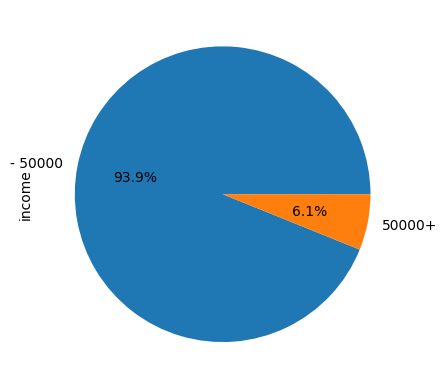

In [2]:
df = pd.read_csv("../Cleaned/KDD/census-income.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['income'].value_counts())
df['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Sex

Female    148109
Male      136447
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

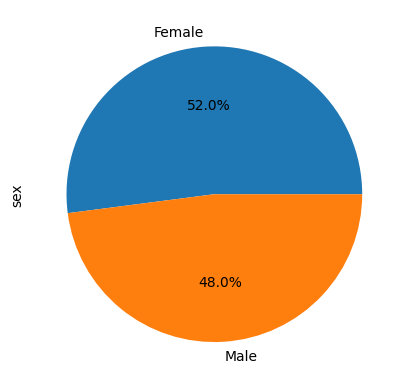

In [3]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Male

- 50000    122756
50000+      13691
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

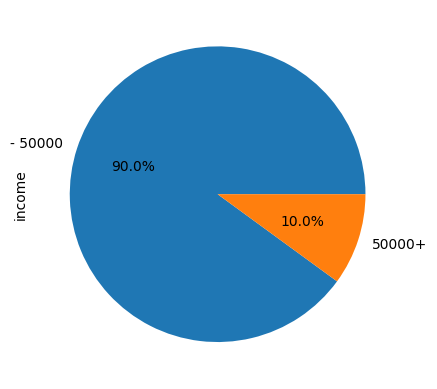

In [4]:
print(df.loc[df['sex']=="Male"]['income'].value_counts())
df.loc[df['sex']=="Male"]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Female

- 50000    144398
50000+       3711
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

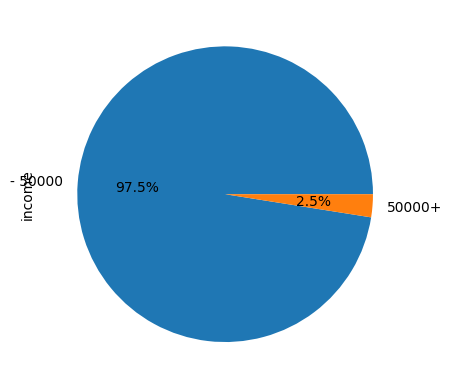

In [5]:
print(df.loc[df['sex']=="Female"]['income'].value_counts())
df.loc[df['sex']=="Female"]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = Male

let s1 = Female

In [6]:
# p(y+|s0) -> p(50000+|Male)
p1 = len(df.loc[(df['sex']=="Male") & (df['income']=="50000+")]) / len(df.loc[df['sex']=="Male"])
#print(p1)
# p(y-|s1) -> p(- 50000|Female)
p2 = len(df.loc[(df['sex']=="Female") & (df['income']=="- 50000")]) / len(df.loc[df['sex']=="Female"])
#print(p2)
# p(y+|s1) -> p(50000+|Female)
p3 = len(df.loc[(df['sex']=="Female") & (df['income']=="50000+")]) / len(df.loc[df['sex']=="Female"])
#print(p3)
# p(y-|s0) -> p(- 50000|Male)
p4 = len(df.loc[(df['sex']=="Male") & (df['income']=="- 50000")]) / len(df.loc[df['sex']=="Male"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 4.340


In [7]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 0.230


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = Male

let s1 = Female

In [8]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 4.005


### Proxies

Most of the proxies found for sex include (a combination of):
 - major_occupation_code

Best model (min depth) found with a node at depth 2 with 52 samples.

	** major_industry_code_Social services > 0.5 , marital_stat_Married-A F spouse present > 0.5 ,  #impurity: 0.0, #samples: 52.

Best model (max sample) found with 3379 sample in a node at depth 6.

    ** detailed_household_and_family_stat_Spouse of householder <= 0.5 , detailed_occupation_recode > 32.5 , marital_stat_Married-civilian spouse present > 0.5 , detailed_occupation_recode <= 34.5 , class_of_worker_Self-employed-not incorporated <= 0.5 , num_persons_worked_for_employer <= 5.5 ,  #impurity: 0.008252142452193079, #samples: 3379.
    
    
Other:

    ** detailed_household_and_family_stat_Spouse of householder <= 0.5 , detailed_occupation_recode > 32.5 , marital_stat_Married-civilian spouse present > 0.5 , detailed_occupation_recode <= 34.5 , class_of_worker_Self-employed-not incorporated <= 0.5 , num_persons_worked_for_employer <= 5.5 , veterans_benefits > 1.5 ,  #impurity: 0.007768032476288211, #samples: 3334.
        

For proxy: major_industry_code == "Social services" & marital_stat == "Married-A F spouse present"

Female    52
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

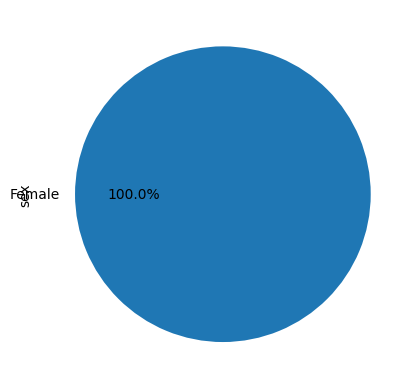

In [10]:
print(df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present")]['sex'].value_counts())
df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present")]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

- 50000    52
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

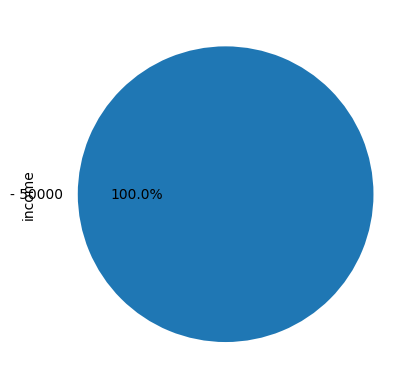

In [11]:
print(df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present")]['income'].value_counts())
df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present")]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [14]:
# p(y+|s0) -> p(50000+|Proxy)
p1 = len(df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present") & (df['income']=="50000+")]) / len(df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present")])
#print(p1)
# p(y-|s1) -> p(- 50000|!Proxy)
p2 = len(df.loc[((df['major_industry_code']!="Social services") | (df['marital_stat']!="Married-A F spouse present")) & (df['income']=="- 50000")]) / len(df.loc[((df['major_industry_code']!="Social services") | (df['marital_stat']!="Married-A F spouse present"))])
#print(p2)
# p(y+|s1) -> p(50000+|!Proxy)
p3 = len(df.loc[((df['major_industry_code']!="Social services") | (df['marital_stat']!="Married-A F spouse present")) & (df['income']=="50000+")]) / len(df.loc[((df['major_industry_code']!="Social services") | (df['marital_stat']!="Married-A F spouse present"))])
#print(p3)
# p(y-|s0) -> p(- 50000|Proxy)
p4 = len(df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present") & (df['income']=="- 50000")]) / len(df.loc[(df['major_industry_code']=="Social services") & (df['marital_stat']=="Married-A F spouse present")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.000


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [15]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.000


For proxy: detailed_household_and_family_stat != "Spouse of householder" & detailed_occupation_recode > 32.5 & marital_stat == "Married-civilian spouse present" & detailed_occupation_recode <= 34.5 & class_of_worker != "Self-employed-not incorporated" & num_persons_worked_for_employer <= 5.5

Male      3365
Female      14
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

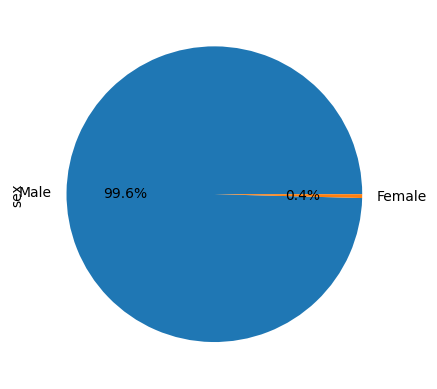

In [18]:
print(df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5)]['sex'].value_counts())
df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5)]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

- 50000    3107
50000+      272
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

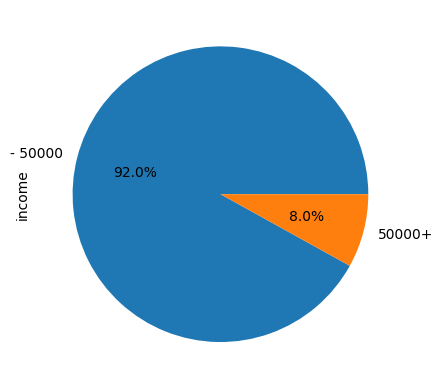

In [19]:
print(df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5)]['income'].value_counts())
df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5)]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [20]:
#df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5)]
# p(y+|s0) -> p(50000+|Proxy)
p1 = len(df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5) & (df['income']=="50000+")]) / len(df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5)])
#print(p1)
# p(y-|s1) -> p(- 50000|!Proxy)
p2 = len(df.loc[((df['detailed_household_and_family_stat']=="Spouse of householder") | (df['detailed_occupation_recode']<=32.5) | (df['marital_stat']!="Married-civilian spouse present") | (df['detailed_occupation_recode']>34.5) | (df['class_of_worker']=="Self-employed-not incorporated") | (df['num_persons_worked_for_employer']>5.5)) & (df['income']=="- 50000")]) / len(df.loc[((df['detailed_household_and_family_stat']=="Spouse of householder") | (df['detailed_occupation_recode']<=32.5) | (df['marital_stat']!="Married-civilian spouse present") | (df['detailed_occupation_recode']>34.5) | (df['class_of_worker']=="Self-employed-not incorporated") | (df['num_persons_worked_for_employer']>5.5))])
#print(p2)
# p(y+|s1) -> p(50000+|!Proxy)
p3 = len(df.loc[((df['detailed_household_and_family_stat']=="Spouse of householder") | (df['detailed_occupation_recode']<=32.5) | (df['marital_stat']!="Married-civilian spouse present") | (df['detailed_occupation_recode']>34.5) | (df['class_of_worker']=="Self-employed-not incorporated") | (df['num_persons_worked_for_employer']>5.5)) & (df['income']=="50000+")]) / len(df.loc[((df['detailed_household_and_family_stat']=="Spouse of householder") | (df['detailed_occupation_recode']<=32.5) | (df['marital_stat']!="Married-civilian spouse present") | (df['detailed_occupation_recode']>34.5) | (df['class_of_worker']=="Self-employed-not incorporated") | (df['num_persons_worked_for_employer']>5.5))])
#print(p3)
# p(y-|s0) -> p(- 50000|Proxy)
p4 = len(df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5) & (df['income']=="- 50000")]) / len(df.loc[(df['detailed_household_and_family_stat']!="Spouse of householder") & (df['detailed_occupation_recode']>32.5) & (df['marital_stat']=="Married-civilian spouse present") & (df['detailed_occupation_recode']<=34.5) & (df['class_of_worker']!="Self-employed-not incorporated") & (df['num_persons_worked_for_employer']<=5.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.349


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [21]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.321


## Race

White                          239081
Black                           29239
Asian or Pacific Islander        7734
Other                            5096
Amer Indian Aleut or Eskimo      3406
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

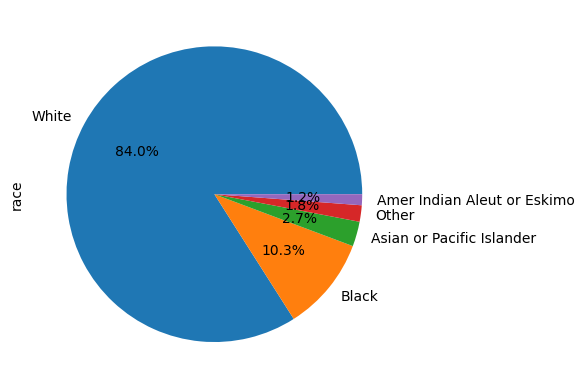

In [22]:
print(df['race'].value_counts())
df['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = White

- 50000    223154
50000+      15927
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

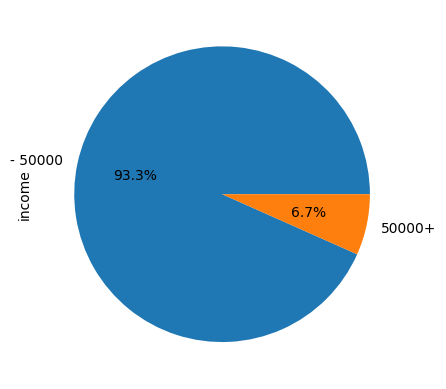

In [24]:
print(df.loc[df['race']=="White"]['income'].value_counts())
df.loc[df['race']=="White"]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Black

- 50000    28482
50000+       757
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

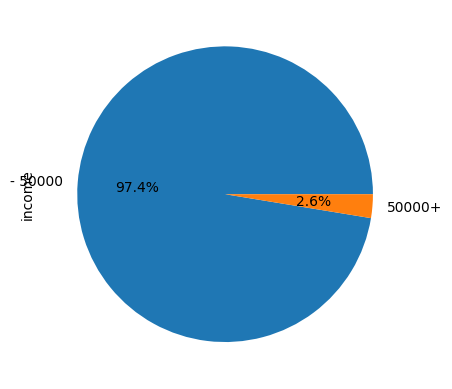

In [25]:
print(df.loc[df['race']=="Black"]['income'].value_counts())
df.loc[df['race']=="Black"]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Asian or Pacific Islander

- 50000    7195
50000+      539
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

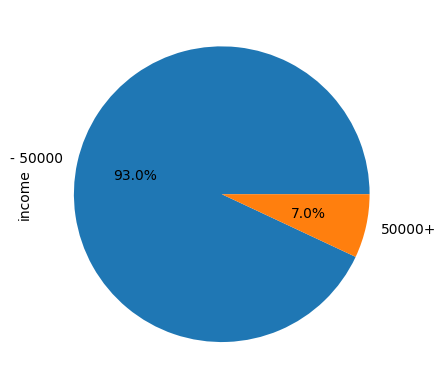

In [26]:
print(df.loc[df['race']=="Asian or Pacific Islander"]['income'].value_counts())
df.loc[df['race']=="Asian or Pacific Islander"]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Amer Indian Aleut or Eskimo

- 50000    3332
50000+       74
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

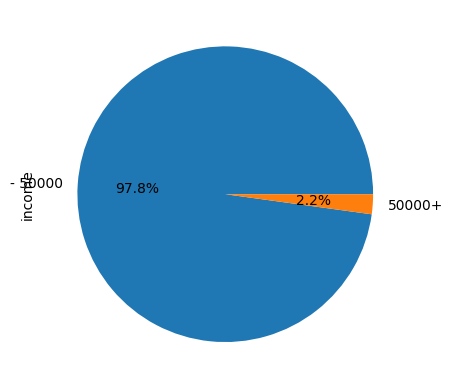

In [27]:
print(df.loc[df['race']=="Amer Indian Aleut or Eskimo"]['income'].value_counts())
df.loc[df['race']=="Amer Indian Aleut or Eskimo"]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Other

- 50000    4991
50000+      105
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

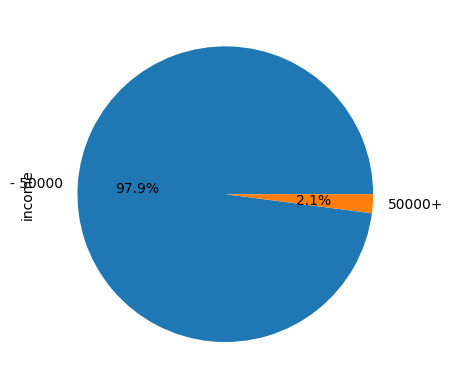

In [28]:
print(df.loc[df['race']=="Other"]['income'].value_counts())
df.loc[df['race']=="Other"]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = White

let s1 = not White

In [29]:
# p(y+|s0) -> p(50000+|White)
p1 = len(df.loc[(df['race']=="White") & (df['income']=="50000+")]) / len(df.loc[df['race']=="White"])
#print(p1)
# p(y-|s1) -> p(- 50000|!White)
p2 = len(df.loc[(df['race']!="White") & (df['income']=="- 50000")]) / len(df.loc[df['race']!="White"])
#print(p2)
# p(y+|s1) -> p(50000+|!White)
p3 = len(df.loc[(df['race']!="White") & (df['income']=="50000+")]) / len(df.loc[df['race']!="White"])
#print(p3)
# p(y-|s0) -> p(- 50000|White)
p4 = len(df.loc[(df['race']=="White") & (df['income']=="- 50000")]) / len(df.loc[df['race']=="White"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 2.129


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = White

let s1 = not White

In [30]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 2.054


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = Black

let s1 = not Black

In [31]:
# p(y+|s0) -> p(50000+|Black)
p1 = len(df.loc[(df['race']=="Black") & (df['income']=="50000+")]) / len(df.loc[df['race']=="Black"])
#print(p1)
# p(y-|s1) -> p(- 50000|!Black)
p2 = len(df.loc[(df['race']!="Black") & (df['income']=="- 50000")]) / len(df.loc[df['race']!="Black"])
#print(p2)
# p(y+|s1) -> p(50000+|!Black)
p3 = len(df.loc[(df['race']!="Black") & (df['income']=="50000+")]) / len(df.loc[df['race']!="Black"])
#print(p3)
# p(y-|s0) -> p(- 50000|Black)
p4 = len(df.loc[(df['race']=="Black") & (df['income']=="- 50000")]) / len(df.loc[df['race']=="Black"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.381


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = Black

let s1 = not Black

In [32]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.397


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = Asian or Pacific Islander

let s1 = not Asian or Pacific Islander

In [33]:
# p(y+|s0) -> p(50000+|Asian or Pacific Islander)
p1 = len(df.loc[(df['race']=="Asian or Pacific Islander") & (df['income']=="50000+")]) / len(df.loc[df['race']=="Asian or Pacific Islander"])
#print(p1)
# p(y-|s1) -> p(- 50000|!Asian or Pacific Islander)
p2 = len(df.loc[(df['race']!="Asian or Pacific Islander") & (df['income']=="- 50000")]) / len(df.loc[df['race']!="Asian or Pacific Islander"])
#print(p2)
# p(y+|s1) -> p(50000+|!Asian or Pacific Islander)
p3 = len(df.loc[(df['race']!="Asian or Pacific Islander") & (df['income']=="50000+")]) / len(df.loc[df['race']!="Asian or Pacific Islander"])
#print(p3)
# p(y-|s0) -> p(- 50000|Asian or Pacific Islander)
p4 = len(df.loc[(df['race']=="Asian or Pacific Islander") & (df['income']=="- 50000")]) / len(df.loc[df['race']=="Asian or Pacific Islander"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.155


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = Asian or Pacific Islander

let s1 = not Asian or Pacific Islander

In [34]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.144


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = Amer Indian Aleut or Eskimo

let s1 = not Amer Indian Aleut or Eskimo

In [35]:
# p(y+|s0) -> p(50000+|Amer Indian Aleut or Eskimo)
p1 = len(df.loc[(df['race']=="Amer Indian Aleut or Eskimo") & (df['income']=="50000+")]) / len(df.loc[df['race']=="Amer Indian Aleut or Eskimo"])
#print(p1)
# p(y-|s1) -> p(- 50000|!Amer Indian Aleut or Eskimo)
p2 = len(df.loc[(df['race']!="Amer Indian Aleut or Eskimo") & (df['income']=="- 50000")]) / len(df.loc[df['race']!="Amer Indian Aleut or Eskimo"])
#print(p2)
# p(y+|s1) -> p(50000+|!Amer Indian Aleut or Eskimo)
p3 = len(df.loc[(df['race']!="Amer Indian Aleut or Eskimo") & (df['income']=="50000+")]) / len(df.loc[df['race']!="Amer Indian Aleut or Eskimo"])
#print(p3)
# p(y-|s0) -> p(- 50000|Amer Indian Aleut or Eskimo)
p4 = len(df.loc[(df['race']=="Amer Indian Aleut or Eskimo") & (df['income']=="- 50000")]) / len(df.loc[df['race']=="Amer Indian Aleut or Eskimo"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.338


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = Amer Indian Aleut or Eskimo

let s1 = not Amer Indian Aleut or Eskimo

In [36]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.353


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = Other

let s1 = not Other

In [37]:
# p(y+|s0) -> p(50000+|Other)
p1 = len(df.loc[(df['race']=="Other") & (df['income']=="50000+")]) / len(df.loc[df['race']=="Other"])
#print(p1)
# p(y-|s1) -> p(- 50000|!Other)
p2 = len(df.loc[(df['race']!="Other") & (df['income']=="- 50000")]) / len(df.loc[df['race']!="Other"])
#print(p2)
# p(y+|s1) -> p(50000+|!Other)
p3 = len(df.loc[(df['race']!="Other") & (df['income']=="50000+")]) / len(df.loc[df['race']!="Other"])
#print(p3)
# p(y-|s0) -> p(- 50000|Other)
p4 = len(df.loc[(df['race']=="Other") & (df['income']=="- 50000")]) / len(df.loc[df['race']=="Other"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.319


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = Other

let s1 = not Other

In [38]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.333


### Proxies

Most of the proxies found for race include (a combination of):
 - native-country
 - relationship
 - education
 - occupation


Best model (min depth) found with a node at depth 2 with 3212 samples.

	** family_members_under_18_Mother only present <= 0.5 , country_of_birth_father_Italy > 0.5 ,  #impurity: 0.006212692440707213, #samples: 3212.

Best model (max sample) found with 3231 sample in a node at depth 9.

    ** country_of_birth_mother_Philippines <= 0.5 , country_of_birth_father_India <= 0.5 , country_of_birth_father_South Korea <= 0.5 , country_of_birth_self_China <= 0.5 , country_of_birth_father_Jamaica <= 0.5 , country_of_birth_mother_Japan <= 0.5 , country_of_birth_father_Vietnam <= 0.5 , country_of_birth_father_United-States <= 0.5 , country_of_birth_father_Italy > 0.5 ,  #impurity: 0.006793136093291574, #samples: 3231.



For proxy: family_members_under_18 != "Mother only present" & country_of_birth_father == Italy

White                        3202
Other                           6
Asian or Pacific Islander       2
Black                           2
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

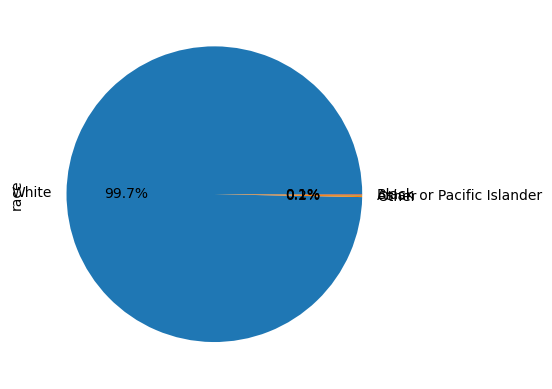

In [42]:
print(df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy")]['race'].value_counts())
df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy")]['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

- 50000    2989
50000+      223
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

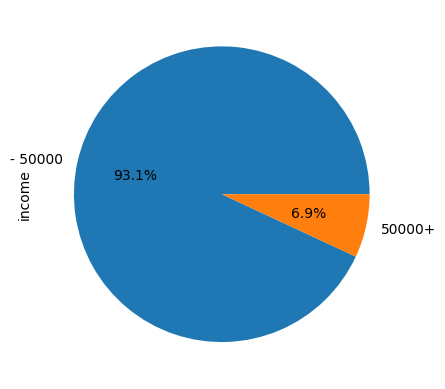

In [43]:
print(df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy")]['income'].value_counts())
df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy")]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [44]:
# p(y+|s0) -> p(50000+|Proxy)
p1 = len(df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy") & (df['income']=="50000+")]) / len(df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy")])
#print(p1)
# p(y-|s1) -> p(- 50000|!Proxy)
p2 = len(df.loc[((df['family_members_under_18']=="Mother only present") | (df['country_of_birth_father']!="Italy")) & (df['income']=="- 50000")]) / len(df.loc[((df['family_members_under_18']=="Mother only present") | (df['country_of_birth_father']!="Italy"))])
#print(p2)
# p(y+|s1) -> p(50000+|!Proxy)
p3 = len(df.loc[((df['family_members_under_18']=="Mother only present") | (df['country_of_birth_father']!="Italy")) & (df['income']=="50000+")]) / len(df.loc[((df['family_members_under_18']=="Mother only present") | (df['country_of_birth_father']!="Italy"))])
#print(p3)
# p(y-|s0) -> p(- 50000|Proxy)
p4 = len(df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy") & (df['income']=="- 50000")]) / len(df.loc[(df['family_members_under_18']!="Mother only present") & (df['country_of_birth_father']=="Italy")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.147


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [45]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.137


For proxy: country_of_birth_mother != Philippines & country_of_birth_self != China & country_of_birth_mother != Japan & country_of_birth_father == Italy


White                          3220
Other                             6
Asian or Pacific Islander         2
Black                             2
Amer Indian Aleut or Eskimo       1
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

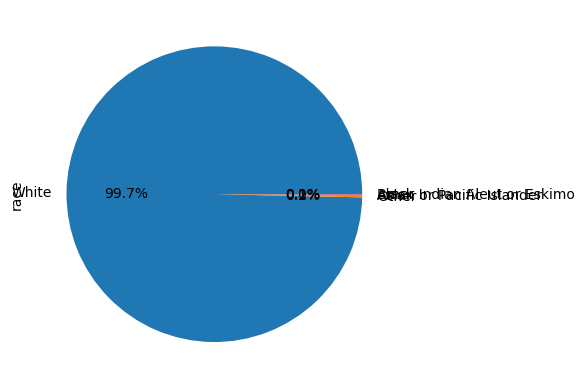

In [46]:
print(df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy")]['race'].value_counts())
df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy")]['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

- 50000    3008
50000+      223
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

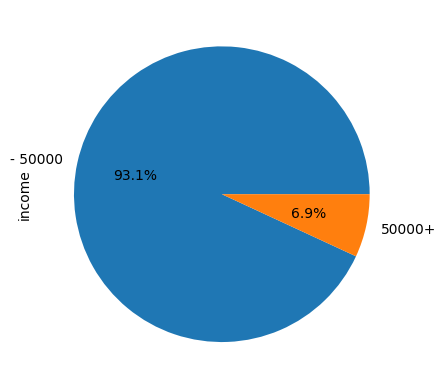

In [47]:
print(df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy")]['income'].value_counts())
df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy")]['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 50000+

let y- = - 50000

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [48]:
# (df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy")
# p(y+|s0) -> p(50000+|Proxy)
p1 = len(df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy") & (df['income']=="50000+")]) / len(df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy")])
#print(p1)
# p(y-|s1) -> p(- 50000|!Proxy)
p2 = len(df.loc[((df['country_of_birth_mother']=="Philippines") | (df['country_of_birth_self']=="China") | (df['country_of_birth_mother']=="Japan") | (df['country_of_birth_father']!="Italy")) & (df['income']=="- 50000")]) / len(df.loc[((df['country_of_birth_mother']=="Philippines") | (df['country_of_birth_self']=="China") | (df['country_of_birth_mother']=="Japan") | (df['country_of_birth_father']!="Italy"))])
#print(p2)
# p(y+|s1) -> p(50000+|!Proxy)
p3 = len(df.loc[((df['country_of_birth_mother']=="Philippines") | (df['country_of_birth_self']=="China") | (df['country_of_birth_mother']=="Japan") | (df['country_of_birth_father']!="Italy")) & (df['income']=="50000+")]) / len(df.loc[((df['country_of_birth_mother']=="Philippines") | (df['country_of_birth_self']=="China") | (df['country_of_birth_mother']=="Japan") | (df['country_of_birth_father']!="Italy"))])
#print(p3)
# p(y-|s0) -> p(- 50000|Proxy)
p4 = len(df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy") & (df['income']=="- 50000")]) / len(df.loc[(df['country_of_birth_mother']!="Philippines") & (df['country_of_birth_self']!="China") & (df['country_of_birth_mother']!="Japan") & (df['country_of_birth_father']=="Italy")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.140


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 50000+

let y- = - 50000

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [49]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.130
